Instalación de paquetes

In [ ]:
pip install scikit-learn

In [ ]:
pip install pandas folium openpyxl

Importación de librerias

In [ ]:
import pandas as pd
import folium
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Análisis Tipologico enfocada para la caracterización de los agrícultores de la cadena de la papa en Colombia

# Resumen
La generación de tipologías en el sector agrícola es una herramienta crucial para la caracterización de los diferentes actores que forman parte de la cadena de producción y comercialización. Esta práctica se considera parte del estado del arte en la gestión del cultivo, y realizar la construcción de tipologías de manera adecuada ofrece grandes ventajas.

Nuestro objetivo principal es desarrollar una tipología para los agricultores de papa utilizando información recolectada del CNA (Centro Nacional de Agricultura) y datos generados por la UPRA (Unidad de Planificación Rural Agropecuaria). El propósito es obtener una visión clara de los actores en la primera fase de la producción y comercialización de papa. De esta manera, buscamos consolidar bloques de productores según sus rendimientos y características socioeconómicas.

La utilización de tipologías,

# Descripción

Título del proyecto.
Resumen. Una síntesis de lo hecho hasta el momento. Ésta es una parte critica de un trabajo, de hecho, es a veces lo único que se lee. Es por ello, que es una parte integral del proyecto y en esta primera entrega se espera que ustedes tengan una primera aproximación que irán mejorando con el tiempo
Introducción. Donde se establece el problema o la pregunta bien definida con una motivación clara para resolverla.
Revisión preliminar de antecedentes en la literatura. Revisión de literatura nacional e internacional, para enriquecer el proyecto con lo que ya se haya escrito sobre el tema que se va a tratar.  
Descripción detallada de los datos.  Descripción que incorpore estadísticas descriptivas y/o visualizaciones.
Propuesta metodológica. En esta sección debe mostrarse cómo el proyecto incorpora aprendizaje no supervisado y qué algoritmo planean utilizar. (Este algoritmo puede ser preliminar y pueden modificarlo para la entrega final, si ven que a lo largo del curso incorporan nuevas herramientas que pueden resultar más apropiadas)
Bibliografía. Incorpora los artículos mencionados en el texto.

Tipologia para la identificación del cultivo de papa en Colombia

# Estadísticas descriptivas


In [ ]:
archivo_excel = 'UPAS_PAPA.xls'

# Leer el archivo Excel
df = pd.read_excel(archivo_excel, engine='xlrd')

# Mostrar las primeras filas del DataFrame para verificar que se cargó correctamente
df.head()

,OBJECTID,UPA_AREA_ha,VARIEDAD,TIPO_CULTIVO,AREA_SEMBRADA_CRIOLLA,AREA_COSECHADA_CRIOLLA,PRODUCCION_CRIOLLA,RENDIMIENTO_CRIOLLA,AREA_SEMBRADA_NEGRA,AREA_COSECHADA_NEGRA,...,aptitudS2,Area_Carto_ha,Tamanopredial16,Informalidad,AF,Aptitud_ps1,Aptitud_ps2,tipo_frontera,POINT_X,POINT_Y
0,1,4.536894,Papa negra,Técnificado,NaN,NaN,NaN,NaN,5.675319,2.837659,...,No apta,0.770883,"A2.Mayor a 0,5 ha - hasta 1 ha",INFORMAL,Agricultura familiar,No_Apto,No_Apto,No condicionada,-77.136139,0.466445
1,2,5.746113,Papa negra,Técnificado,NaN,NaN,NaN,NaN,6.251476,3.125738,...,No apta,16.680406,C1.Mayor a 10 ha - hasta 20 ha,INFORMAL,NaN,No_Apto,No_Apto,No condicionada,-77.178711,0.528617
2,3,2.497989,Papa negra,Tradicional,NaN,NaN,NaN,NaN,2.700281,1.350141,...,No apta,16.680406,C1.Mayor a 10 ha - hasta 20 ha,INFORMAL,NaN,No_Apto,No_Apto,No condicionada,-77.178711,0.528617
3,4,3.067768,Papa negra,Técnificado,NaN,NaN,NaN,NaN,1.784022,0.892011,...,No apta,16.680406,C1.Mayor a 10 ha - hasta 20 ha,INFORMAL,NaN,No_Apto,No_Apto,No condicionada,-77.178711,0.528617
4,5,4.313402,Papa negra,Técnificado,NaN,NaN,NaN,NaN,2.891453,1.445727,...,No apta,16.680406,C1.Mayor a 10 ha - hasta 20 ha,INFORMAL,NaN,No_Apto,No_Apto,No condicionada,-77.178711,0.528617


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37484 entries, 0 to 37483
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   OBJECTID                37484 non-null  int64  
 1   UPA_AREA_ha             37484 non-null  float64
 2   VARIEDAD                37484 non-null  object 
 3   TIPO_CULTIVO            37484 non-null  object 
 4   AREA_SEMBRADA_CRIOLLA   6221 non-null   float64
 5   AREA_COSECHADA_CRIOLLA  6221 non-null   float64
 6   PRODUCCION_CRIOLLA      6221 non-null   float64
 7   RENDIMIENTO_CRIOLLA     1258 non-null   float64
 8   AREA_SEMBRADA_NEGRA     32869 non-null  float64
 9   AREA_COSECHADA_NEGRA    32869 non-null  float64
 10  PRODUCCION_NEGRA        32869 non-null  float64
 11  RENDIMIENTO_NEGRA       32869 non-null  float64
 12  elemento                37484 non-null  object 
 13  aptitudS1               37484 non-null  object 
 14  aptitudS2               37484 non-null

In [ ]:
df.describe()

,OBJECTID,UPA_AREA_ha,AREA_SEMBRADA_CRIOLLA,AREA_COSECHADA_CRIOLLA,PRODUCCION_CRIOLLA,RENDIMIENTO_CRIOLLA,AREA_SEMBRADA_NEGRA,AREA_COSECHADA_NEGRA,PRODUCCION_NEGRA,RENDIMIENTO_NEGRA,Area_Carto_ha,POINT_X,POINT_Y
count,37484.000000,37484.000000,6221.000000,6221.000000,6221.000000,1258.000000,32869.000000,32869.000000,32869.000000,32869.000000,36895.000000,37484.000000,37484.000000
mean,18742.500000,30.816426,1.531621,0.276534,4.947853,19.086428,3.190960,2.371406,38.094987,15.589609,304.877690,-75.219435,3.798193
std,10820.843082,1118.108164,12.054708,2.044221,36.231268,3.510013,71.816320,63.757661,931.580312,5.277459,1898.955830,1.857392,2.160563
min,1.000000,0.007254,0.010017,0.000000,0.000000,0.000273,0.010026,0.010026,0.036156,3.361252,0.003464,-77.941899,0.466445
25%,9371.750000,0.530939,0.105607,0.000000,0.000000,17.831738,0.127145,0.095182,1.306891,12.361419,0.779181,-77.301460,1.164461
50%,18742.500000,1.680011,0.321600,0.000000,0.000000,18.676614,0.539060,0.393605,5.703993,14.925701,2.179344,-75.257668,4.860516
75%,28113.250000,5.190562,1.000000,0.000000,0.000000,20.348524,1.905341,1.372049,21.323980,18.869852,7.456091,-73.514450,5.510657
max,37484.000000,123198.560100,572.782411,123.417969,2222.049240,112.083752,8192.000000,8192.000000,125889.037665,34.959519,102149.890628,-72.260310,7.534768


In [ ]:
mapa = folium.Map(location=[4.5709, -74.2973], zoom_start=6)

# Seleccionar el 10% de los datos de forma aleatoria
df_sample = df.sample(frac=0.01, random_state=42)

# Crea un mapa base centrado en Colombia
mapa = folium.Map(location=[4.5709, -74.2973], zoom_start=6)

# Iterar sobre las filas del DataFrame de la muestra y agregar marcadores al mapa
for index, row in df_sample.iterrows():
    lat = row['POINT_Y']  # Latitud
    lon = row['POINT_X']  # Longitud
    folium.Marker([lat, lon], popup=f'Point {index}').add_to(mapa)


In [ ]:
mapa

In [ ]:
# Filtran solo las columnas numéricas
df_numerico = df.select_dtypes(include=['float64', 'int64'])
df_numerico=df_numerico.drop(columns=['POINT_X','POINT_Y','OBJECTID'])

In [ ]:
scaler = StandardScaler()

# Ajustar el escalador y transformar los datos numéricos
df_numerico_estandarizado = pd.DataFrame(scaler.fit_transform(df_numerico), columns=df_numerico.columns)

# Reemplazar los datos originales por los estandarizados en el DataFrame original
df[df_numerico.columns] = df_numerico_estandarizado

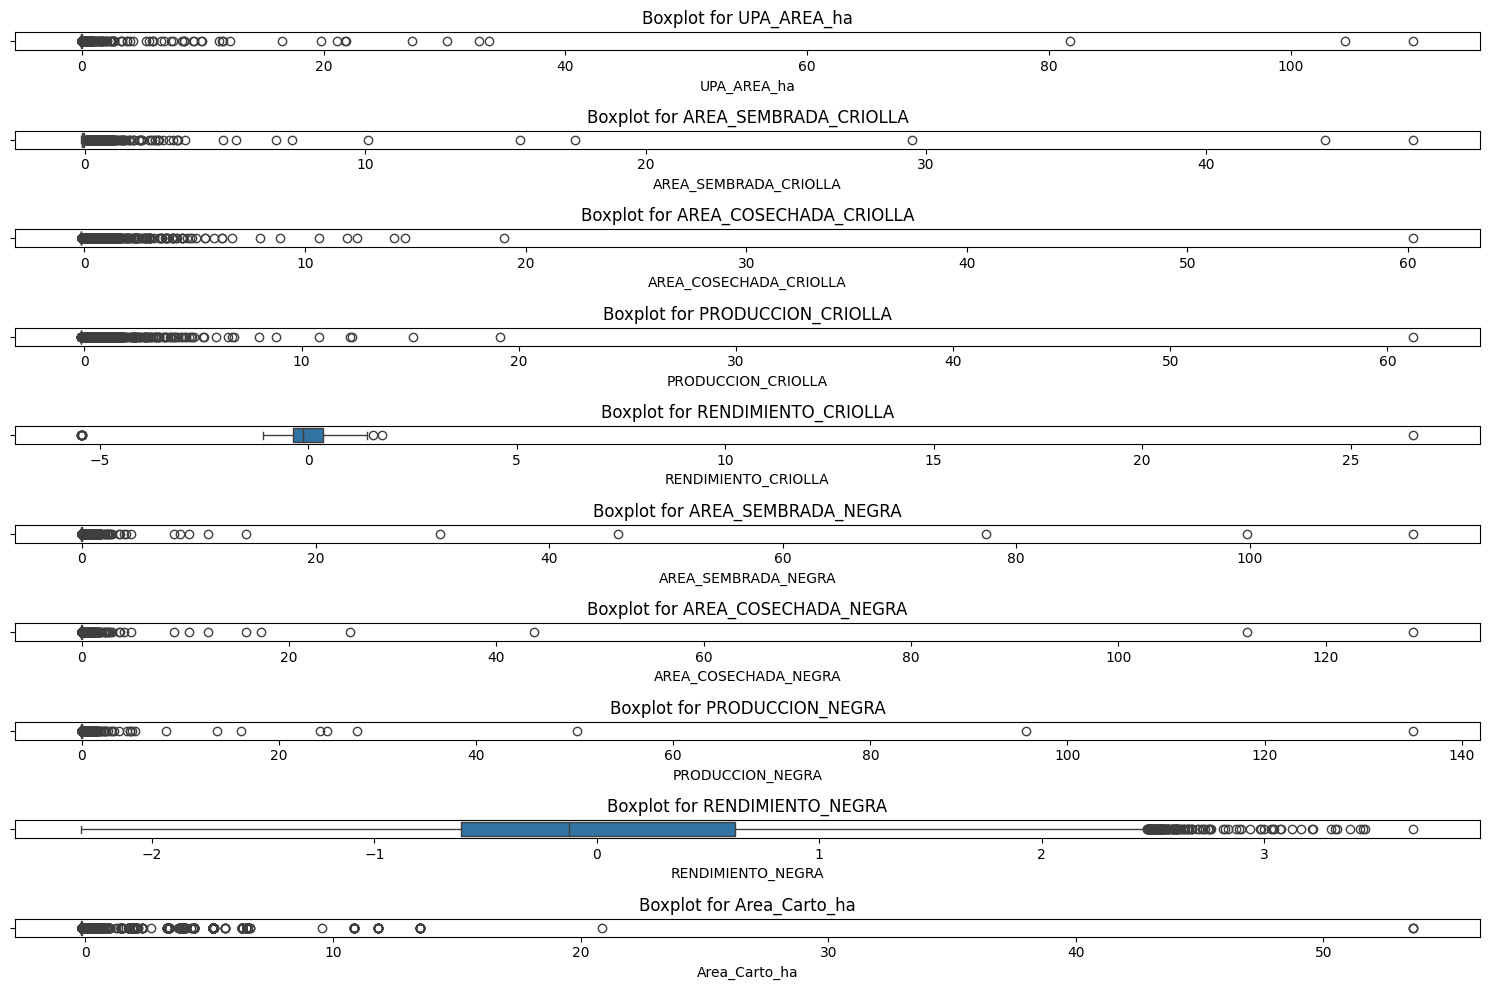

In [ ]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(15, 10))

# Generar un boxplot para cada columna numérica
for i, column in enumerate(df_numerico.columns, 1):
    plt.subplot(len(df_numerico.columns), 1, i)
    sns.boxplot(x=df_numerico[column])
    plt.title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()